# The heat equation on the line

We consider
$$
u_t -k u_{xx} = 0, \quad k\in\mathbb{R_+}, x\in\mathbb{R}, u(x,0) = \phi(x)
$$

As we saw in class, the solution of this problem is

$$
u(x,t) = \frac1{\sqrt{4\pi k t}}
  \int_{-\infty}^{\infty} e^{-\frac{(x-y)^2}{4kt}}\phi(y)dy
 $$

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import animation
plt.rc('animation', html='jshtml')

from sympy import *
init_printing()

In [2]:
x,y = symbols('x y', real=True)
t = Symbol('t', real=True, positive=True)
k = Symbol('k', real=True, positive=True)
u = Function('u')
phi = Function('phi', real=True)

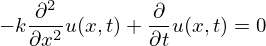

In [3]:
heat_eq = u(x,t).diff(t) - k*u(x,t).diff(x,x)
Eq(heat_eq, 0)

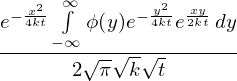

In [4]:
sol = 1/sqrt(4 * pi * k * t) * integrate(
    exp(-(x-y)**2/(4*k*t))*phi(y),
    (y, -oo, oo)
)
sol

In [5]:
# The solver here is a bit unstable, despite the assumptions above sometimes it succeeds
# and sometimes fails
checkpdesol(heat_eq, simplify(sol))[0]

False

In [6]:
def animate(u, xlim, ylim, tspan):
    fig, ax = plt.subplots()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    line, = plt.plot([], [], lw=2)
    
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        xl, xr = xlim
        x = np.linspace(xl, xr, 1000)
        uxt = u(x,tspan[i])
        line.set_data(x, uxt)
        return line,

    # call the animator
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(tspan), interval=50,
                                   blit=True)

    return anim

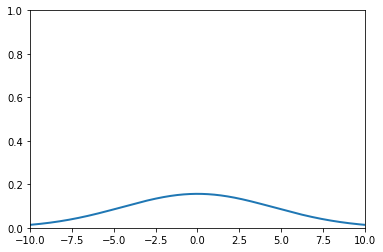

In [7]:
s = sol.replace(k,1).replace(phi(y),exp(-y**2)).doit()
u = lambdify([x, t], s)
animate(u, (-10,10), (0.0,1.0), np.linspace(0.1, 10.0, 50))

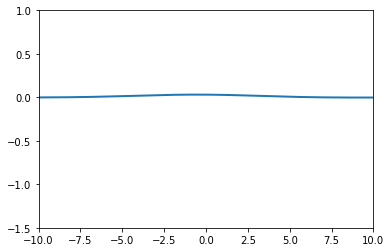

In [8]:
s = sol.replace(k,1).replace(phi(y),2*exp(-y**2)-exp(-(1-y)**2)-1/2*exp(-(1+y)**2/3)).doit()
u = lambdify([x, t], s)
animate(u, (-10,10), (-1.5,1.0), np.linspace(0.1, 10.0, 50))

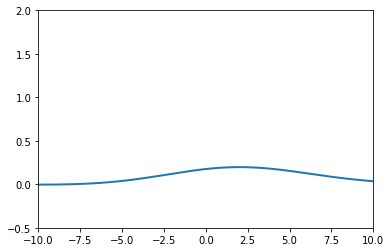

In [10]:
s = sol.replace(k,1).replace(phi(y),2*exp(-(1-y)**2)-1/2*exp(-(1+y)**2/3)).doit()
u = lambdify([x, t], s)
animate(u, (-10,10), (-0.5,2.0), np.linspace(0.1, 10.0, 50))